In [1]:
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

df_reddit = pd.read_csv('redditdaten.csv',index_col=0)
df_reddit['created'] = df_reddit['created'].apply(lambda x: x[:10])

In [2]:
def generateWordcloudSpecific(df, coin):
    tags = ''
    fig=plt.figure(figsize=(8,8))
    for data in df[df[coin]]['selftext']:
        val = str(data)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tags += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800,height=600,background_color='white',min_font_size=10,stopwords=STOPWORDS)\
        .generate(tags)
    plt.imshow(wordcloud)
    plt.title(coin)
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
def generateWordcloud(df):
    tags = ''
    fig=plt.figure(figsize=(8,8))
    for data in df['selftext']:
        val = str(data)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        tags += " ".join(tokens) + " "

    wordcloud = WordCloud(width=800,height=600,background_color='white',min_font_size=10,stopwords=STOPWORDS)\
        .generate(tags)
    plt.imshow(wordcloud)
    plt.title('Allgemein')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
def generateLineChartOfCoinMentions(df,coin):
    count = df[df[coin]]['created']
    count.value_counts().plot.line(legend=True,label=coin)

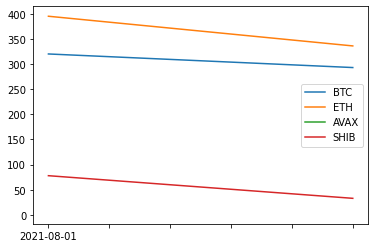

In [3]:
generateLineChartOfCoinMentions(df_reddit,'BTC')
generateLineChartOfCoinMentions(df_reddit,'ETH')
generateLineChartOfCoinMentions(df_reddit,'AVAX')
generateLineChartOfCoinMentions(df_reddit,'SHIB')

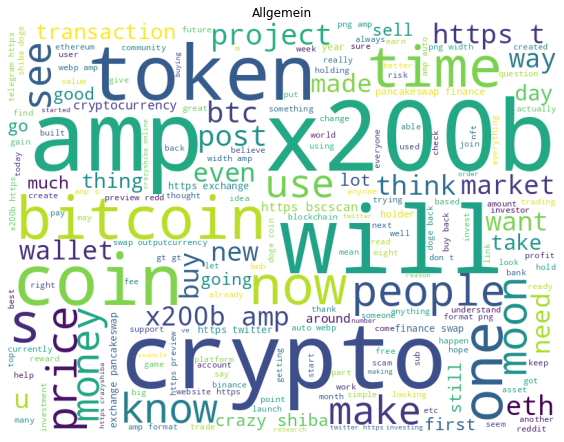

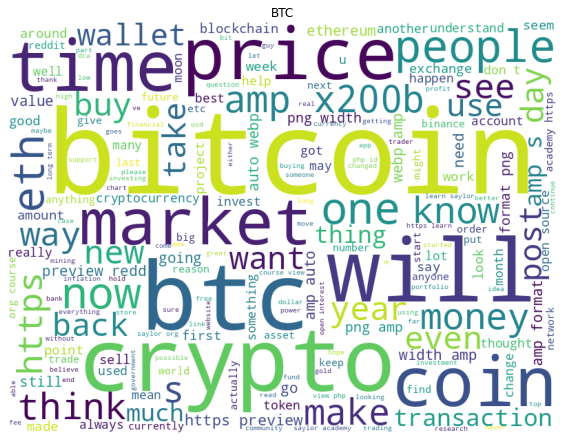

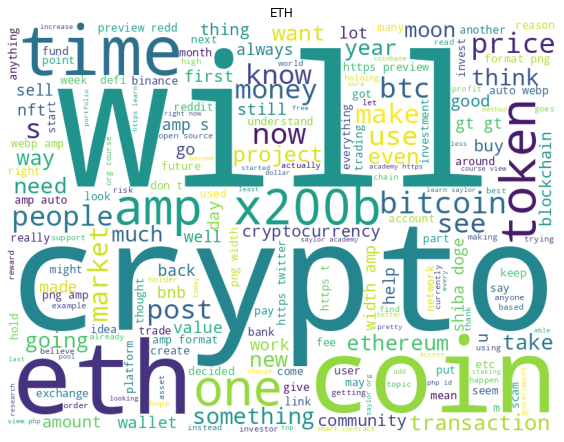

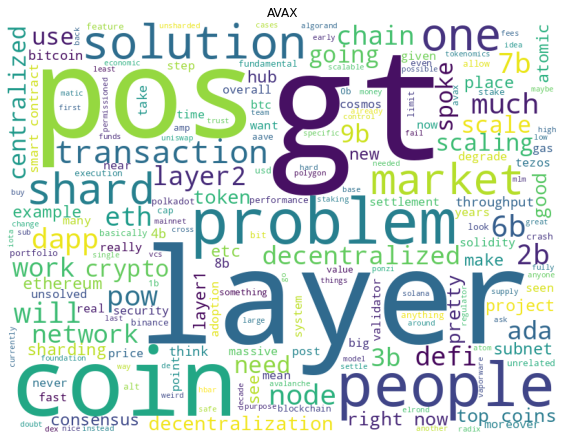

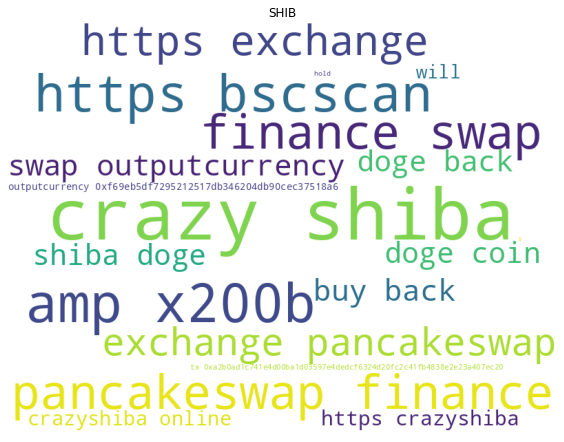

In [4]:
generateWordcloud(df_reddit)
generateWordcloudSpecific(df_reddit,'BTC')
generateWordcloudSpecific(df_reddit,'ETH')
generateWordcloudSpecific(df_reddit,'AVAX')
generateWordcloudSpecific(df_reddit,'SHIB')

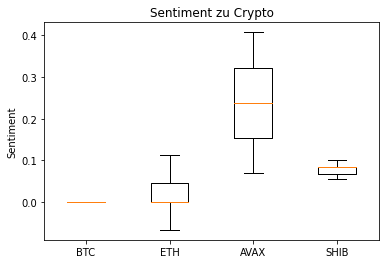

In [5]:
btcSent = df_reddit[df_reddit['BTC']]['Sentiment'].values
ethSent = df_reddit[df_reddit['ETH']]['Sentiment'].values
avaxSent = df_reddit[df_reddit['AVAX']]['Sentiment'].values
shibSent = df_reddit[df_reddit['SHIB']]['Sentiment'].values

data = [btcSent,ethSent,avaxSent,shibSent]
plt.boxplot(data,labels=['BTC','ETH','AVAX','SHIB'],sym="")
plt.ylabel("Sentiment")
plt.title("Sentiment zu Crypto")
plt.show()

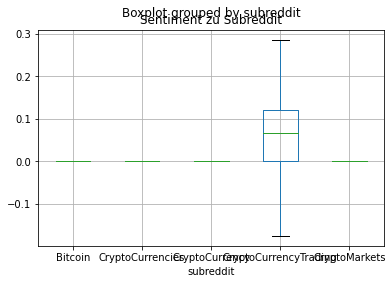

In [15]:
#Nur als Idee
df_reddit.boxplot(column='Sentiment',by='subreddit',sym="")
plt.title("Sentiment zu Subreddit")
plt.show()
